## Importação das bibliotecas utilizadas
Python 3.9.10 - 64-bit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import AutoARIMA

C:\Users\Gustavo Zwicker\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\validation\series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
C:\Users\Gustavo Zwicker\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:18: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  RELATIVE_TYPES = (pd.Int64Index, pd.RangeIndex)
C:\Users\Gustavo Zwicker\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:19: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ABSOLUTE_TYPES = (pd.Int64Index, pd.RangeIndex, 

## Importação da base de dados de receitas da prefeitura

In [2]:
dateparse = lambda dates: pd.PeriodIndex(dates, freq='M')
# Formatador das datas extraídas da base de dados para o formato Period do Pandas.
receitas_df = pd.read_csv('receita.csv', usecols=['data', 'icms', 'ipva', 'fundeb', 'comp', 'participacao'], 
                        index_col='data', parse_dates=['data'], date_parser=dateparse)

In [3]:
display(receitas_df.head())
# Exibição das primeiras linhas do DataFrame. 
# Com isso, podemos observar que não houve arrecadação 'comp' no ano de 1995.

,icms,ipva,fundeb,comp,participacao
data,,,,,
1995-01,281244.02,318905.00,4521.85,0.0,0.086013
1995-02,237653.16,122860.28,2768.75,0.0,0.086013
1995-03,317906.56,33729.69,5857.95,0.0,0.086013
1995-04,302607.66,12918.55,3205.29,0.0,0.086013
1995-05,347590.66,14748.54,6652.47,0.0,0.086013


In [4]:
display(receitas_df.describe())
# Exibição de uma breve descrição estatística dos valores.

,icms,ipva,fundeb,comp,participacao
count,3.200000e+02,3.200000e+02,320.000000,320.000000,300.000000
mean,1.505684e+06,3.392399e+05,12472.938969,4218.460656,0.104861
std,1.178685e+06,6.025901e+05,7949.711124,6862.852084,0.021380
min,2.376532e+05,4.176150e+03,2768.750000,0.000000,0.082264
25%,5.439889e+05,4.848538e+04,5957.555000,50.447500,0.088327
50%,1.094359e+06,1.626798e+05,10093.945000,121.010000,0.095104
75%,2.173449e+06,3.020396e+05,17234.912500,7630.942500,0.116139
max,6.144994e+06,4.231629e+06,42596.380000,28678.300000,0.150174


In [5]:
icms = receitas_df.icms
ipva = receitas_df.ipva
fundeb = receitas_df.fundeb
comp = receitas_df.comp
# Separação de cada imposto em suas respectivas variáveis, para melhor entendimento do código.

data = [icms, ipva, fundeb, comp]

# Plotagem dos gráficos.
Podemos observar que o imposto com uma sazonalidade mais acentuada é o IPVA. O qual, entre os impostos, será o melhor explicado por modelos de previsão de séries temporais.

<function matplotlib.pyplot.show(close=None, block=None)>

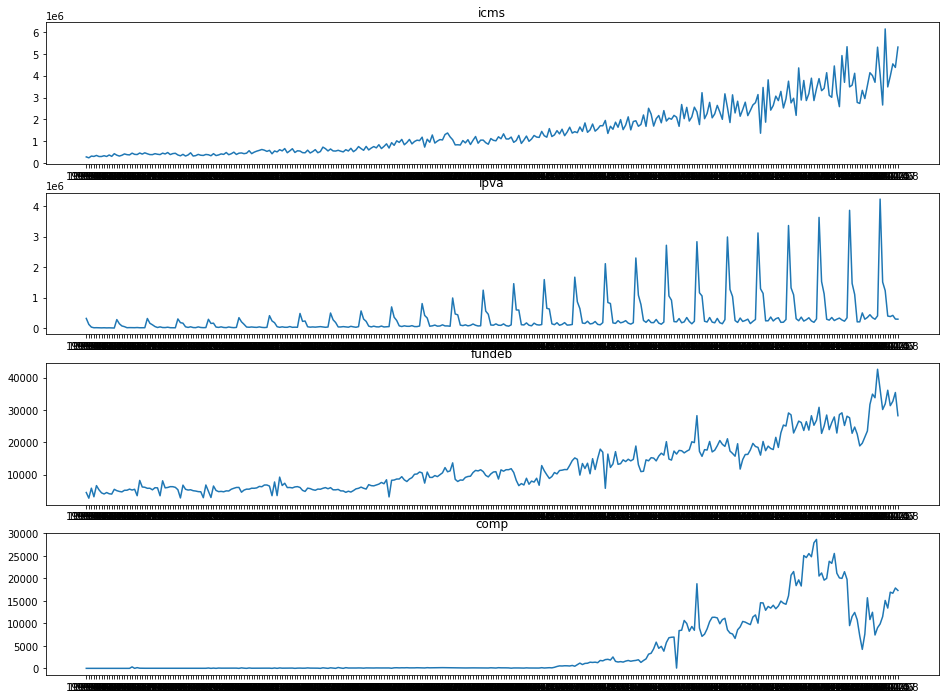

In [6]:
fig, ax = plt.subplots(nrows= 4, figsize=(16,12))
for x, x_index in zip(data, range(len(data))):
    ax[x_index].set_title(receitas_df.columns[x_index])
    ax[x_index].plot(x.index.astype(str).tolist(), x.values)
    
plt.show

# Treinamento e previsão do modelo AutoARIMA
Vale ressaltar que o AutoARIMA não é um modelo em si, ele testa diversos modelos com a base de dados fornecida e escolhe o melhor entre eles.

In [7]:
y_icms_train, y_icms_test = temporal_train_test_split(icms[:312], test_size=12)
y_ipva_train, y_ipva_test = temporal_train_test_split(ipva[:312], test_size=12)
y_fundeb_train, y_fundeb_test = temporal_train_test_split(fundeb[:312], test_size=12)
y_comp_train, y_comp_test = temporal_train_test_split(comp[:312], test_size=12)

display(y_icms_train.shape)
display(y_icms_test.shape)
# Separação dos dados em amostras de treino e teste.
# Escolhi utilizar o penúltimo ano para testagem, pois ele possuí informações de todos os meses.

(300,)

(12,)

In [8]:
model = AutoARIMA(sp=12, start_p=1, max_p=20, start_q=1, max_q=20, random_state = 0,suppress_warnings=True)



In [9]:
model.fit(y_ipva_train)

C:\Users\Gustavo Zwicker\AppData\Local\Programs\Python\Python39\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,2)(2,1,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_error
fh = np.arange(len(y_ipva_test)) + 1
fh

prediction = model.predict(fh)

display(prediction)
display(y_ipva_test)
print(prediction - y_ipva_test)
print(mean_absolute_percentage_error(y_ipva_test ,prediction, symmetric = True))
print(mean_absolute_error(y_ipva_test ,prediction, symmetric = True))

C:\Users\Gustavo Zwicker\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:100: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  values = pd.Int64Index(values, dtype=int)


2020-01    3.810270e+06
2020-02    1.583813e+06
2020-03    1.161233e+06
2020-04    3.178497e+05
2020-05    2.769906e+05
2020-06    3.641954e+05
2020-07    2.658906e+05
2020-08    3.103594e+05
2020-09    3.454963e+05
2020-10    2.885180e+05
2020-11    2.396291e+05
2020-12    3.601287e+05
Freq: M, dtype: float64

data
2020-01    3863921.79
2020-02    1466627.80
2020-03    1106307.88
2020-04     205647.29
2020-05     206780.83
2020-06     500085.56
2020-07     292673.30
2020-08     350475.39
2020-09     440266.07
2020-10     342980.13
2020-11     292107.55
2020-12     402948.98
Freq: M, Name: ipva, dtype: float64

2020-01    -53651.407210
2020-02    117184.733986
2020-03     54925.483655
2020-04    112202.378009
2020-05     70209.764212
2020-06   -135890.185905
2020-07    -26782.741449
2020-08    -40115.998508
2020-09    -94769.741920
2020-10    -54462.103071
2020-11    -52478.454956
2020-12    -42820.248109
Freq: M, dtype: float64
0.17610573198427007
71291.10341579099


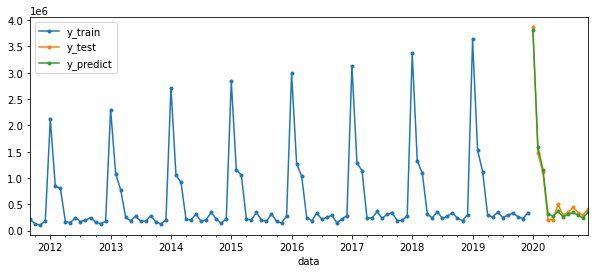

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
y_ipva_train[200:].plot(ax=ax, label='y_train', style='.-')
y_ipva_test.plot(ax=ax, label='y_test', style='.-')
prediction.plot(ax=ax, label='y_predict', style='.-')
plt.legend()
plt.savefig('predict-airline-data-plot.png', dpi=300, bbox_inches='tight')
plt.show()
